C:\Users\bgpa4\AppData\Local\Temp\ipykernel_7676\4080572482.py:54: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


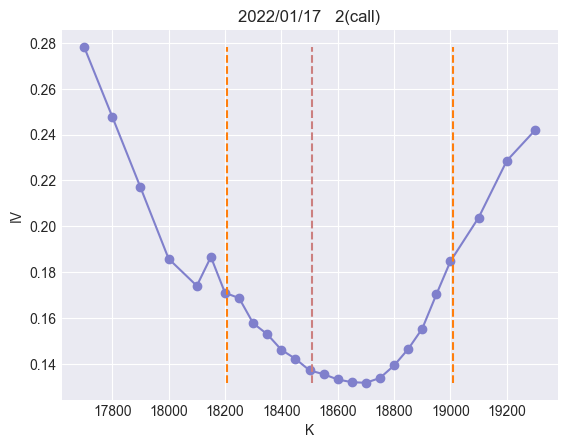

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

expiry = 'NearbyMonth'
IV_Data = pd.read_csv('./../../../OrganizeAll/Data/Organized/IV/{}/All.csv'.format(expiry),  encoding='Big5', index_col=False)
IV_matrix = np.array(IV_Data)


price_type = '結算價'

column_names_closing  = ['成交量', '期貨{}'.format(price_type), '履約價', '買賣權', price_type, \
                         '無風險利率', '到期天數', '隱含波動率({})'.format(price_type)]
column_index_closing = [IV_Data.columns.get_loc(col) for col in column_names_closing]


dates = np.unique(IV_matrix[:,0])

date = np.random.choice(dates,1)[0]
date = '2022/01/17'


one_day_D = IV_matrix[IV_matrix[:,0] == date]
F_one_day = one_day_D[0:2, column_index_closing[1]]

call_D = one_day_D[one_day_D[:,column_index_closing[3]] == 'call'] 
put_D = one_day_D[one_day_D[:, column_index_closing[3]] == 'put'] 

#買權隱含波動率最大值
iv_call_max = call_D[:-3, column_index_closing[7]].max()
#賣權隱含波動率最大值
iv_put_max = put_D[8:,column_index_closing[7]].max()
#買權隱含波動率最小值
iv_call_min = call_D[:-3,column_index_closing[7]].min()
#賣權隱含波動率最小值
iv_put_min = put_D[8:,column_index_closing[7]].min()
#當天近月交易隱含波動率最大值
iv_max =  max(iv_call_max, iv_put_max)
#當天近月交易隱含波動率最小值
iv_min =  min(iv_call_min, iv_put_min)





call_color = [0.5,0.5,0.8]
futures_color = [0.8, 0.5, 0.5]


K = call_D[:-3,column_index_closing[2]]
iv = call_D[:-3,column_index_closing[7]]
#買權曲線
plt.style.use('seaborn-darkgrid')
plt.plot(K, iv, c=call_color, label='IV smile', marker='o')
plt.plot(F_one_day, [iv_call_min, iv_call_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.plot(F_one_day-300, [iv_call_min, iv_call_max], ls='--', c='#ff7f0e', \
         label = 'futures price')
plt.plot(F_one_day+500, [iv_call_min, iv_call_max], ls='--', c='#ff7f0e', \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV')
plt.title('{}   {}(call)'.format(date, one_day_D[0,column_index_closing[6]]))    


#賣權曲線

plt.xlabel('K')
plt.ylabel('IV')



plt.show()

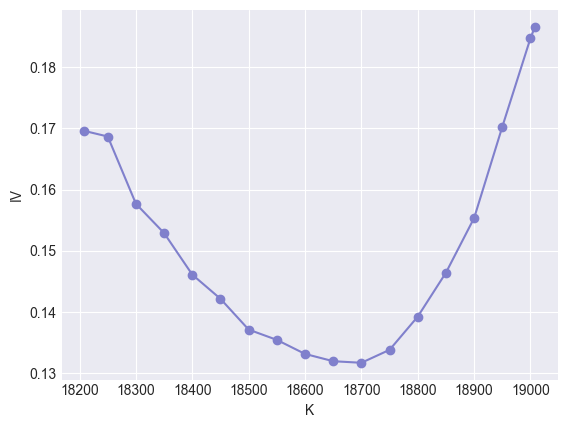

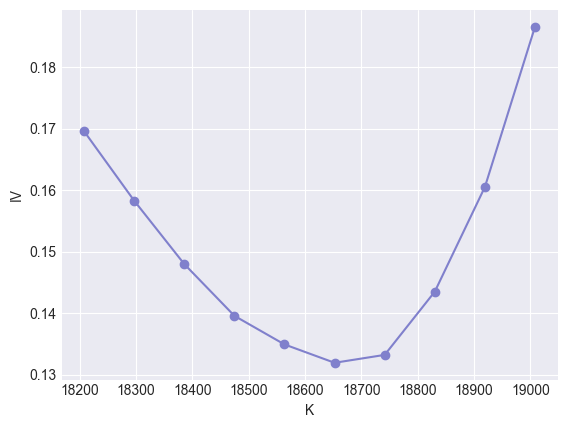

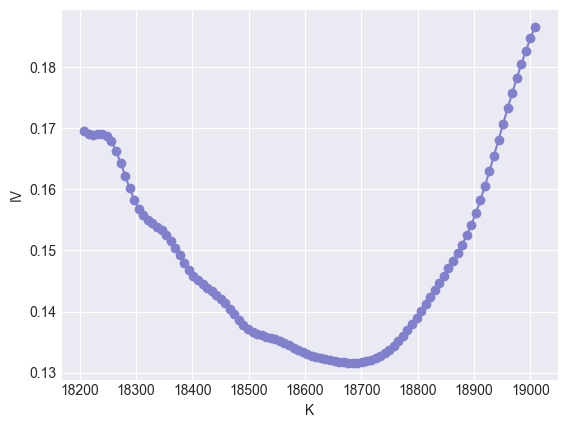

In [18]:
from function.interp import cubic_spline_interp
LB = F_one_day[0]-300
UB = F_one_day[0]+500
A = cubic_spline_interp(K,iv)
iv_new = A([LB, UB ])
K_filter = K[K>LB]
iv_filter = iv[K>LB]
iv_filter = iv_filter[K_filter<UB]
K_filter = K_filter[K_filter<UB]
iv_new = np.hstack((iv_new[0], iv_filter, iv_new[1]))
K_new = np.hstack((LB, K_filter, UB))



plt.plot(K_new, iv_new, c=call_color, label='IV smile', marker='o')
#plt.plot(F_one_day, [iv_call_min, iv_call_max], ls='--', c=futures_color, \
         #label = 'futures price')
#plt.plot(F_one_day-300, [iv_call_min, iv_call_max], ls='--', c='#ff7f0e', \
         #label = 'futures price')
#plt.plot(F_one_day+500, [iv_call_min, iv_call_max], ls='--', c='#ff7f0e', \
         #label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV')
#plt.title('{}   {}(call)'.format(date, one_day_D[0,column_index_closing[6]]))
plt.show()

#----------------------------------------------------------------------------

K_show = np.linspace(K_new[0], K_new[-1], 10)
iv_show = A(K_show )
plt.plot(K_show , iv_show , c=call_color, label='IV smile', marker='o')
plt.xlabel('K')
plt.ylabel('IV')
plt.show()

#-------------------------

K_show = np.linspace(K_new[0], K_new[-1], 100)
iv_show = A(K_show )
plt.plot(K_show , iv_show , c=call_color, label='IV smile', marker='o')
plt.xlabel('K')
plt.ylabel('IV')
plt.show()